In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The first thing to do is to import and read the dataset into our notebook

In [2]:
titanic = pd.read_csv("train.csv")
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


checking for missing values

### Cleaning procces

In [3]:
print(titanic.isna().sum())
#AGE, CABIN and EMBARKED have some missing values
print(titanic.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


In [4]:
men_age = titanic[titanic["Sex"] == "male"] #take men apart 
mean_men_age = np.mean(men_age["Age"]) #taking the mean age of the mens in the ship
men_age = men_age.fillna({"Age":mean_men_age}) #replacing missing values with the mean
print(men_age["Age"].isna().sum()) # No more missing values

0


same logic for women that was used in men 

In [5]:
women_age = titanic[titanic["Sex"] == "female"]
mean_age_women = np.mean(women_age["Age"])
women_age = women_age.fillna({"Age":mean_age_women})
print(women_age["Age"].isna().sum())

0


In [6]:
titanic_ok = pd.concat([men_age,women_age])
titanic_ok.sort_values("PassengerId")

#We can confirmn that we havent losed any important information

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.915709,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [7]:
assert titanic_ok["Age"].isna().sum() == 0

For the models we wont be ussing this columns

In [8]:
col_to_del = ["PassengerId","Name","Cabin","Ticket"]
for col in col_to_del:
    del(titanic_ok[col])

for the two missing values in "Embarked", I am going to replace with the most common port of embarkation

In [9]:
most_common_port = titanic_ok["Embarked"].mode()[0] #Port S, Southampton
titanic_ok = titanic_ok.fillna({"Embarked":most_common_port})
#print(titanic_ok.isna().sum()) #not missing values

In [10]:
assert titanic_ok["Embarked"].isna().sum() == 0

In [11]:
titanic_ok

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,30.726645,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
...,...,...,...,...,...,...,...,...
880,1,2,female,25.000000,0,1,26.0000,S
882,0,3,female,22.000000,0,0,10.5167,S
885,0,3,female,39.000000,0,5,29.1250,Q
887,1,1,female,19.000000,0,0,30.0000,S


### EDA (Exploratoy Data Analysis)

In [12]:
sns.set_style("whitegrid")
plt.style.use("ggplot")

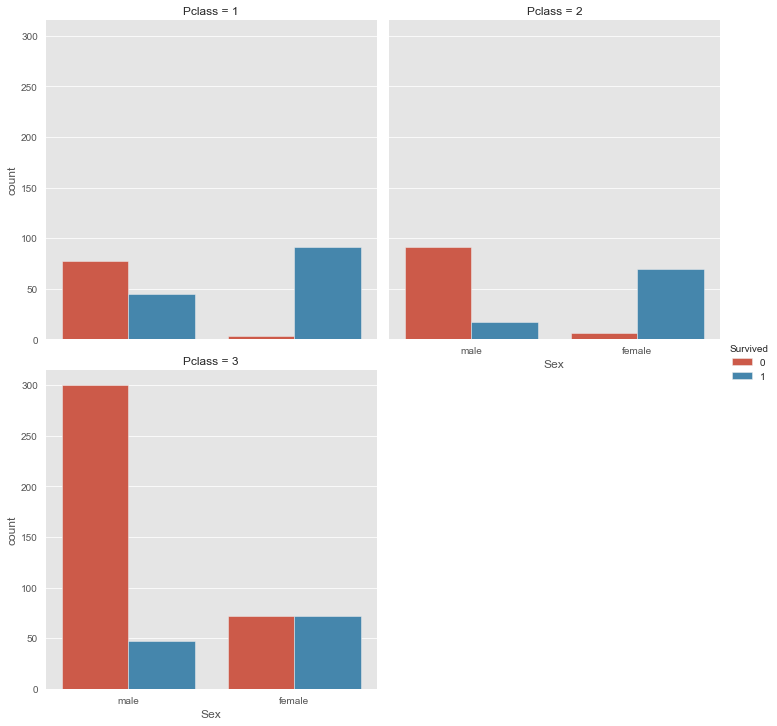

In [13]:
sns.catplot(x="Sex",data=titanic_ok,kind="count",hue="Survived",col="Pclass",col_wrap=2)
plt.show()

In [14]:
titanic_ok.groupby(["Pclass","Sex"])["Survived"].sum()

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64

As is seeing above, I can notice that the Pclass with the most survivers is the first class, followed by the third and finally the second. this is not a surprise, the priority is to save the "rich" people but what do is surprised is that I found more survivors on the third class than in the second class.

The Famale sex has more chances to survive.

In [15]:
to_int = lambda x : int(x)
titanic_ok["Age"] = titanic_ok["Age"].apply(to_int)

C:\Users\pipem\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pipem\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


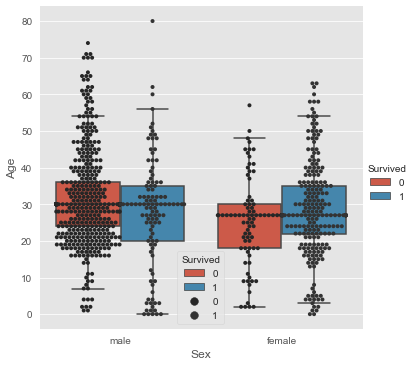

In [16]:
sns.catplot(x="Sex",y="Age",data=titanic_ok,kind="box",sym="",hue="Survived")
sns.swarmplot(x="Sex",y="Age",data=titanic_ok,hue="Survived",size=4,dodge=True,color=".2")
plt.show()

Above I can see how the age is distributed through sex and its hue by either survived or not.
interesting things to notice: 
      1. The oldest person to survived was a male of approximately 80 years old.
      2. the majority of the survivors are women between 20 and 35 years old. 
      

### Modelling. 


In [17]:
#Final date set to model.
titanic_ok

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
4,0,3,male,35,0,0,8.0500,S
5,0,3,male,30,0,0,8.4583,Q
6,0,1,male,54,0,0,51.8625,S
7,0,3,male,2,3,1,21.0750,S
...,...,...,...,...,...,...,...,...
880,1,2,female,25,0,1,26.0000,S
882,0,3,female,22,0,0,10.5167,S
885,0,3,female,39,0,5,29.1250,Q
887,1,1,female,19,0,0,30.0000,S


In [18]:
copy_titanic = titanic_ok.copy()

In [19]:
def sex_dum(sex):
    if sex == "male":
        return 1
    else:
        return 0
copy_titanic["Sex"] = copy_titanic["Sex"].apply(sex_dum)

In [20]:
def embarked_dum(type):
    if type == "S":
        return 0
    elif type == "Q":
        return 1
    else:
        return 2
copy_titanic["Embarked"] = copy_titanic["Embarked"].apply(embarked_dum)

In [21]:
copy_titanic #Ready to modelling

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,0
4,0,3,1,35,0,0,8.0500,0
5,0,3,1,30,0,0,8.4583,1
6,0,1,1,54,0,0,51.8625,0
7,0,3,1,2,3,1,21.0750,0
...,...,...,...,...,...,...,...,...
880,1,2,0,25,0,1,26.0000,0
882,0,3,0,22,0,0,10.5167,0
885,0,3,0,39,0,5,29.1250,1
887,1,1,0,19,0,0,30.0000,0


In [22]:
#labels - Target variables
y = copy_titanic["Survived"].values
#Features
X = copy_titanic.drop("Survived",axis=1).values

In [23]:
#lets bring the new data set
test_titanic = pd.read_csv("test.csv")
to_predict = test_titanic[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
to_predict = to_predict.fillna(method="pad")
assert to_predict["Age"].isna().sum() == 0

to_predict["Age"] = to_predict["Age"].apply(to_int)
to_predict["Sex"] = to_predict["Sex"].apply(sex_dum)
to_predict["Embarked"] = to_predict["Embarked"].apply(embarked_dum)

to_predict #READT TO USE
#On this cell, I organized the data and left it ready to use. I just used methods previously defined

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,7.8292,1
1,3,0,47,1,0,7.0000,0
2,2,1,62,0,0,9.6875,1
3,3,1,27,0,0,8.6625,0
4,3,0,22,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,1,28,0,0,8.0500,0
414,1,0,39,0,0,108.9000,2
415,3,1,38,0,0,7.2500,0
416,3,1,38,0,0,8.0500,0


#### 1. KNN (K - nearest neigthbors)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [25]:
SEED = 42

In [26]:
X_scale = scale(X)
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.3,random_state=SEED,stratify=y)

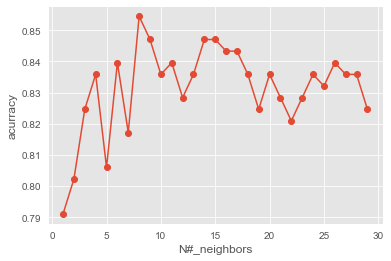

In [27]:
k_range = range(1,30)
scores = list()
for k in k_range:
    knn =  KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(k_range,scores,marker="o")
plt.ylabel("acurracy")
plt.xlabel("N#_neighbors")
plt.show() 

8 is the best number of neighbors for this case lets use it

In [28]:
knn =  KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn))

0.8544776119402985


In [29]:
X_to_predict = scale(to_predict.values)
predictions_knn = knn.predict(X_to_predict)
to_report_knn = pd.DataFrame({'PassengerId': test_titanic.PassengerId, 'Survived': predictions_knn})
#to_report_knn.to_csv('submission.csv', index=False)

 FIRST SUBMISSION IN KEGGLE = 0.75598

#### 2. Logisctic Regression with hyperparameter tunning

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [31]:
log_reg = LogisticRegression()

params_log = {"C":np.logspace(-5,30)}
grid_log = GridSearchCV (estimator = log_reg, param_grid = params_log , cv = 10, n_jobs = -1)
grid_log.fit(X_train,y_train)
C_log = grid_log.best_estimator_ # Best parameter

In [32]:
y_pred_log = grid_log.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred_log)) 

0.8171641791044776


In [33]:
predictions_log = grid_log.best_estimator_.predict(X_to_predict)
to_report_log = pd.DataFrame({'PassengerId': test_titanic.PassengerId, 'Survived': predictions_log})
#to_report_log.to_csv('submission2.csv', index=False)

SECOND SUBMISSION IN KEGGLE = 0.76794, this is a better model than the KNN model

#### 3. Decision tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
d_tree = DecisionTreeClassifier(max_depth = 6, random_state = SEED)
d_tree.fit(X_train,y_train)
y_pred_dtree = d_tree.predict(X_test)
print(accuracy_score(y_test,y_pred_dtree))

0.8470149253731343


In [36]:
predictions_dtree = d_tree.predict(X_to_predict)
to_report_dtree = pd.DataFrame({'PassengerId': test_titanic.PassengerId, 'Survived': predictions_dtree})
#to_report_dtree.to_csv('submission3.csv', index=False)

THIRD SUBMISSION IN KEGGLE = 0.7703

#### 4. Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
r_forest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=SEED)
r_forest.fit(X_train,y_train)
y_pred_rforest = r_forest.predict(X_test)
print(accuracy_score(y_test,y_pred_rforest))

0.8582089552238806


In [39]:
predictions_rforest = r_forest.predict(X_to_predict)
to_report_rforest = pd.DataFrame({'PassengerId': test_titanic.PassengerId, 'Survived': predictions_rforest})
to_report_rforest.to_csv('submission4.csv', index=False)

FOURTH SUBMISSION IN KEGGLE = 0.77990

# To conclude, I must keep working on my models and improve the ways to aboard the problem